In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

Read the dataset to python environment

In [2]:
data=pd.read_excel(r'C:\Users\DELL\Desktop\New folder (2)\iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe

<bound method NDFrame.describe of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
data.shape

(150, 5)

In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Question 2

Do the necessary pre-processing steps

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

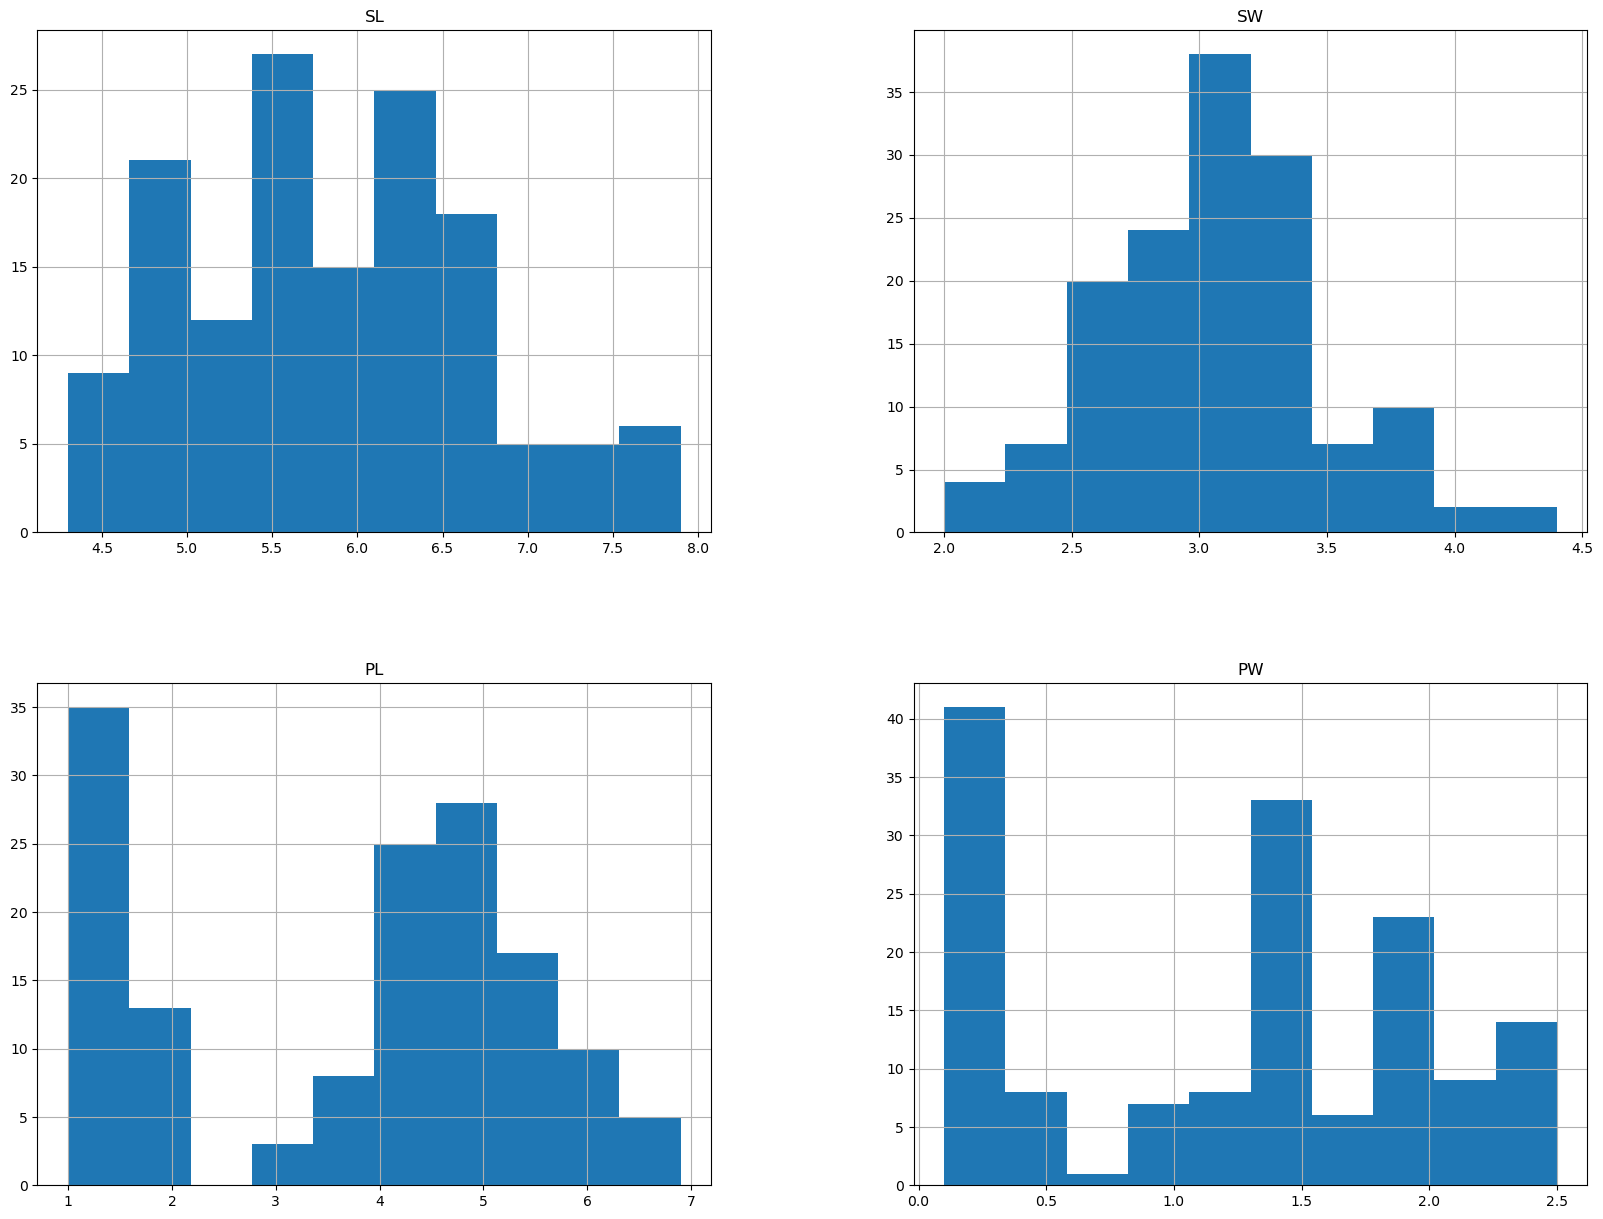

In [31]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [33]:
for col in ['SL', 'SW', 'PL']:
    data[col]=data[col].fillna(data[col].median())

In [34]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [35]:
num_col=['SL', 'SW', 'PL', 'PW']

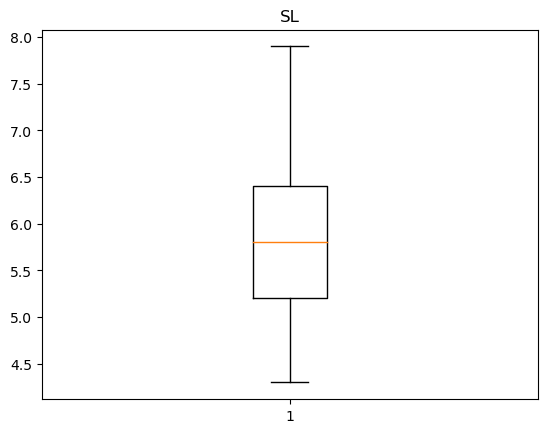

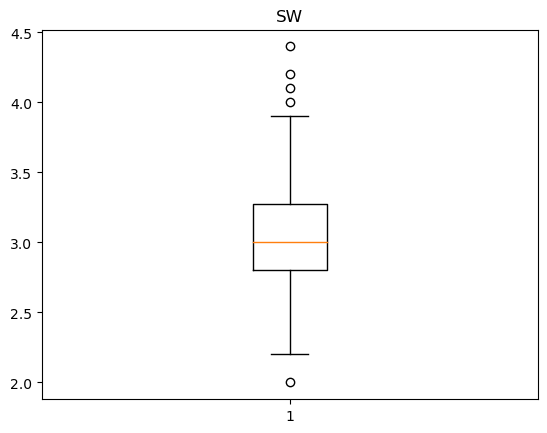

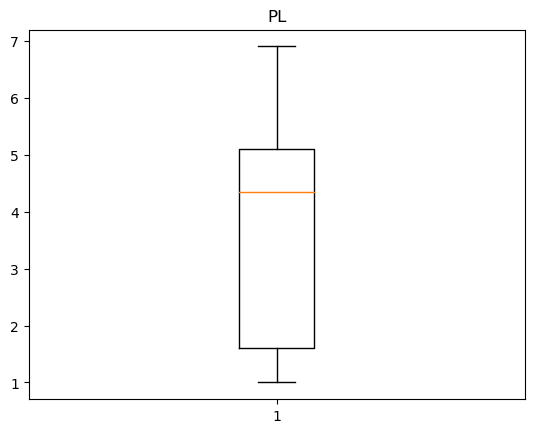

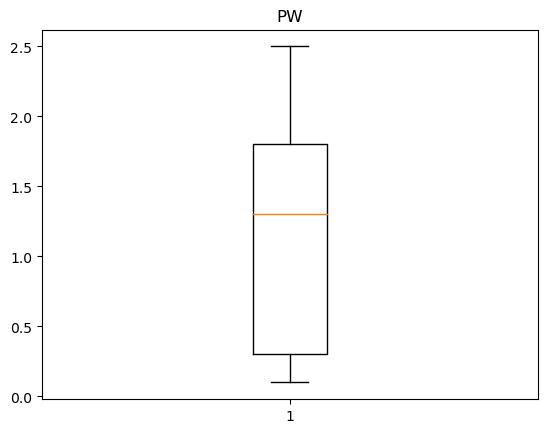

In [36]:
for i in num_col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [37]:
Q1 = np.percentile(data['SW'],25,method="midpoint")
Q2 = np.percentile(data['SW'],50,method="midpoint")
Q3 = np.percentile(data['SW'],75,method="midpoint")

In [38]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [39]:
IQR= Q3-Q1

In [40]:
upp_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

In [41]:
print(upp_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [42]:
data['SW']=np.where(data['SW']>upp_lim,upp_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1bee5a2cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bee5a2d1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bee5a2ca00>],
 'medians': [<matplotlib.lines.Line2D at 0x1bee5a2d6f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bee5a2d990>],
 'means': []}

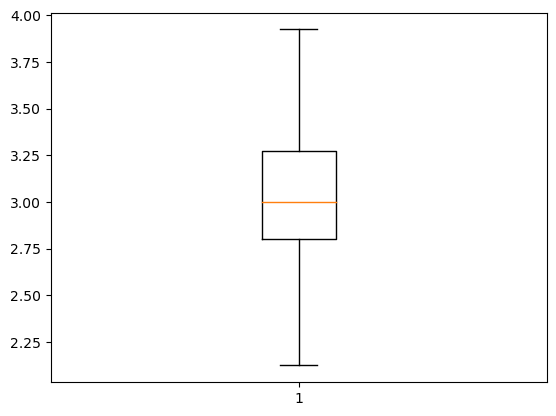

In [43]:
plt.boxplot(data['SW'])

In [44]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
data['Classification']=le.fit_transform(data['Classification'])

In [48]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
data['Classification'].unique()

array([0, 1, 2], dtype=int64)

# Question 3

Find out which classification model gives the best result (try all the 
classification algorithms discussed in the session)

In [50]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression              #logistic regression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
print('Predicted values on test data before inversing',y_pred_lr)

Predicted values on test data before inversing [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 1 2 1
 0]


In [54]:
print('Predicted values on test data:',le.inverse_transform(y_pred_lr))

Predicted values on test data: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 1 2 1
 0]


In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))

Accuracy =  0.9736842105263158


In [56]:
print("Precision Score : ",precision_score(y_test, y_pred_lr,pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred_lr,pos_label='positive',average='micro'))
print('f1 score =',f1_score(y_test,y_pred_lr,pos_label='positive',average='micro'))

Precision Score :  0.9736842105263158
Recall Score :  0.9736842105263158
f1 score = 0.9736842105263158


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [57]:
confusion_matrix(y_test,y_pred_lr)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [58]:
y_pred_lr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0], dtype=int64)

In [59]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
Name: Classification, dtype: int64

In [60]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

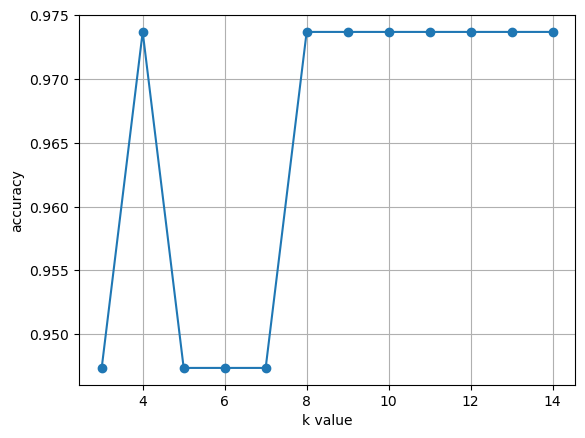

In [61]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [62]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))

Accuracy =  0.9473684210526315


In [65]:
print("Precision Score : ",precision_score(y_test, y_pred_lr,pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred_lr,pos_label='positive',average='micro'))
print('f1 score =',f1_score(y_test,y_pred_lr,pos_label='positive',average='micro'))

Precision Score :  0.9736842105263158
Recall Score :  0.9736842105263158
f1 score = 0.9736842105263158


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [66]:
confusion_matrix(y_test,y_pred_lr)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)